In [42]:
import json
import requests
import pandas as pd
import numpy as np
import random
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

city_list=[
"Boston",
"Miami",
"Seattle",
"New York City",
"Dallas",
"Denver",
"Los Angeles", 
"San Francisco",
"Detroit",
"Honolulu",
]


In [43]:
city_data=pd.read_csv("Data Files/GeoIDs - City.csv")
covid_daily_cases=pd.read_csv("Data Files/COVID Cases - City - Daily.csv")
daily_mobility=pd.read_csv("Data Files/Google Mobility - City - Daily.csv")

In [44]:
city_data=city_data.loc[city_data['cityname'].isin(city_list)]
city_data

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019
0,1,Los Angeles,CA,California,6,10039107
1,2,New York City,NY,New York,36,8336817
6,7,Dallas,TX,Texas,48,2635516
8,9,Seattle,WA,Washington,53,2252782
12,13,Detroit,MI,Michigan,26,1749343
20,21,San Francisco,CA,California,6,881549
24,25,Boston,MA,Massachusetts,25,803907
27,28,Denver,CO,Colorado,8,727211
37,38,Miami,FL,Florida,12,2716940
47,48,Honolulu,HI,Hawaii,15,974563


In [45]:
merge1=pd.merge(city_data,covid_daily_cases,on="cityid",how="left")
merge1.head()

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate
0,1,Los Angeles,CA,California,6,10039107,2020,1,21,0,0,0.0,.
1,1,Los Angeles,CA,California,6,10039107,2020,1,22,0,0,0.0,.
2,1,Los Angeles,CA,California,6,10039107,2020,1,23,0,0,0.0,.
3,1,Los Angeles,CA,California,6,10039107,2020,1,24,0,0,0.0,.
4,1,Los Angeles,CA,California,6,10039107,2020,1,25,0,0,0.0,.


In [46]:
data_df=pd.merge(merge1,daily_mobility,on=["cityid","month","day","year"],how="inner")

In [47]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,0,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,0,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,0,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,0,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,0,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,89,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,114,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,88,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,158,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000


In [48]:
data_df["concat"] = data_df["month"].astype(str) + data_df["day"].astype(str)

In [49]:
data_df

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,...,case_rate,new_case_rate,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_transit_stations,gps_workplaces,gps_residential,gps_away_from_home,concat
0,1,Los Angeles,CA,California,6,10039107,2020,2,24,1,...,0.00996,0,0.00571,-0.00286,.0714,0.00286,0.0214,-0.00143,0.000625,224
1,1,Los Angeles,CA,California,6,10039107,2020,2,25,1,...,0.00996,0,0.01000,-0.00143,.0743,0.00429,0.0229,-0.00286,0.002020,225
2,1,Los Angeles,CA,California,6,10039107,2020,2,26,1,...,0.00996,0,0.01570,0.00286,.0714,0.00571,0.0243,-0.00429,0.003620,226
3,1,Los Angeles,CA,California,6,10039107,2020,2,27,1,...,0.00996,0,0.01860,0.00571,.0757,0.00714,0.0243,-0.00429,0.003620,227
4,1,Los Angeles,CA,California,6,10039107,2020,2,28,1,...,0.00996,0,0.02290,0.01140,.08,0.01000,0.0257,-0.00571,0.005000,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,48,Honolulu,HI,Hawaii,15,974563,2020,9,7,9000,...,923.00000,19.2,-0.41700,-0.15400,-.51,-0.62300,-0.4730,0.18900,-0.231000,97
2006,48,Honolulu,HI,Hawaii,15,974563,2020,9,8,9114,...,935.00000,18.6,-0.41700,-0.15600,-.521,-0.61000,-0.4260,0.17300,-0.212000,98
2007,48,Honolulu,HI,Hawaii,15,974563,2020,9,9,9202,...,944.00000,15.4,-0.41700,-0.15300,-.516,-0.61100,-0.4260,0.17300,-0.212000,99
2008,48,Honolulu,HI,Hawaii,15,974563,2020,9,10,9360,...,960.00000,15,-0.42000,-0.15600,-.503,-0.61000,-0.4260,0.17300,-0.212000,910


In [50]:
data_df["concat"] = data_df["concat"].astype(int)

completed_city_data=data_df.loc[(data_df['month'] >= 3)]

completed_city_data=completed_city_data.sort_values(by=['month', 'day'],ascending=False)

completed_city_data=completed_city_data[:-140]

In [51]:
completed_city_data['New Cases Per Million People']=round((completed_city_data['new_case_count']/(completed_city_data['city_pop2019']/1000000)),0)
completed_city_data['Total Cases Per Million People']=round((completed_city_data['case_count']/(completed_city_data['city_pop2019']/1000000)),0)


In [52]:
completed_city_data=completed_city_data.drop(columns=['gps_retail_and_recreation','gps_grocery_and_pharmacy','gps_parks','gps_transit_stations','gps_workplaces','gps_residential','concat'
])
completed_city_data

,cityid,cityname,stateabbrev,statename,statefips,city_pop2019,year,month,day,case_count,new_case_count,case_rate,new_case_rate,gps_away_from_home,New Cases Per Million People,Total Cases Per Million People
200,1,Los Angeles,CA,California,6,10039107,2020,9,11,252066,1042,2511.000,8.05,-0.1420,104.0,25108.0
401,2,New York City,NY,New York,36,8336817,2020,9,11,241936,250,2902.000,3.08,-0.1110,30.0,29020.0
602,7,Dallas,TX,Texas,48,2635516,2020,9,11,78291,343,2971.000,12,-0.0959,130.0,29706.0
803,9,Seattle,WA,Washington,53,2252782,2020,9,11,20718,133,920.000,3.97,-0.1490,59.0,9197.0
1004,13,Detroit,MI,Michigan,26,1749343,2020,9,11,33138,261,1894.000,10.5,-0.0638,149.0,18943.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,21,San Francisco,CA,California,6,881549,2020,3,15,37,6,4.200,.421,-0.1410,7.0,42.0
1226,25,Boston,MA,Massachusetts,25,803907,2020,3,15,31,4,3.860,.391,-0.0517,5.0,39.0
1427,28,Denver,CO,Colorado,8,727211,2020,3,15,28,5,3.850,.511,-0.0365,7.0,39.0
1628,38,Miami,FL,Florida,12,2716940,2020,3,15,13,5,0.478,.0684,-0.0334,2.0,5.0


In [53]:
completed_city_data['New Cases Per Million People']=completed_city_data['New Cases Per Million People'].astype(float)
completed_city_data['gps_away_from_home'] = pd.to_numeric(completed_city_data['gps_away_from_home'],errors='coerce')
completed_city_data.to_csv("CSV Files/completed_covid_cases_data.csv")

In [54]:
detroit_df=completed_city_data.loc[(completed_city_data['cityname'] =='Detroit')]


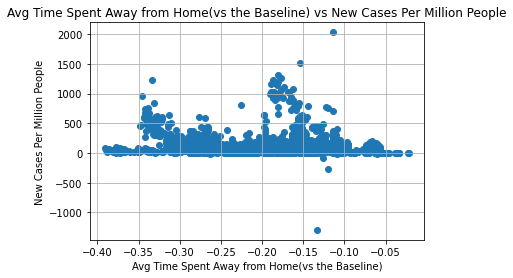

In [55]:

plt.scatter(completed_city_data['gps_away_from_home'],completed_city_data['New Cases Per Million People'])
plt.title("Avg Time Spent Away from Home(vs the Baseline) vs New Cases Per Million People")
plt.ylabel("New Cases Per Million People")
plt.xlabel("Avg Time Spent Away from Home(vs the Baseline)")
plt.grid(True)


In [ ]:
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit_df['gps_away_from_home'],detroit_df['New Cases Per Million People'])

regress_values = slope*detroit_df['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit_df['gps_away_from_home'],detroit_df['New Cases Per Million People'])
plt.title("Detroit Time Spent Away from Home(vs the Baseline) vs New Cases Per Million People")
plt.ylabel("New Cases Per Million People")
plt.grid(True)
plt.xlabel("Avg Time Spent Away from Home(vs the Baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit_df['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a moderate negative correlation.')
print(f'The Linear Regress model for this is {line_eq}')


In [38]:
weather_averages=pd.read_csv("CSV Files/marchseptember.csv")
city_average=completed_city_data.groupby(["cityname","month"]).agg({'gps_away_from_home':'mean'})
city_average=city_average.reset_index()

In [39]:
city_average=city_average.rename(columns={"cityname": "Name", "month": "Period"})
temp_outside_df=pd.merge(weather_averages,city_average, on=["Name","Period"])
temp_outside_df.rename(columns={"gps_parks": "Time Spend not at home vs Baseline"})

,Name,Period,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow Depth,Wind Speed,Wind Gust,Visibility,Cloud Cover,Relative Humidity,gps_away_from_home
0,Dallas,3,88.1,42.2,64.4,37.2,88.1,8.97,NaN,23.0,40.3,8.8,66.9,69.38,-0.161682
1,Dallas,4,96.2,41.0,65.9,33.1,93.7,1.27,NaN,27.7,40.3,9.5,58.8,60.76,-0.236500
2,Dallas,5,95.0,55.1,75.2,NaN,101.1,4.77,NaN,25.3,43.0,9.7,52.1,61.31,-0.167161
3,Dallas,6,99.0,65.0,83.7,NaN,101.4,5.97,NaN,31.1,49.2,9.7,41.9,54.04,-0.123500
4,Dallas,7,101.9,74.0,86.4,NaN,110.3,1.46,NaN,23.0,55.3,9.8,44.9,59.85,-0.130387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Miami,5,87.7,66.5,78.9,NaN,93.6,14.60,NaN,23.7,33.8,9.4,13.9,72.73,-0.229871
66,Miami,6,90.2,74.7,83.4,NaN,100.3,5.63,NaN,15.7,24.2,9.8,12.7,75.05,-0.164167
67,Miami,7,96.2,74.9,84.6,NaN,105.5,10.16,NaN,21.8,33.3,9.7,16.9,72.30,-0.174065
68,Miami,8,92.0,75.2,85.2,NaN,104.9,7.38,NaN,24.9,35.8,9.7,15.9,73.98,-0.161613


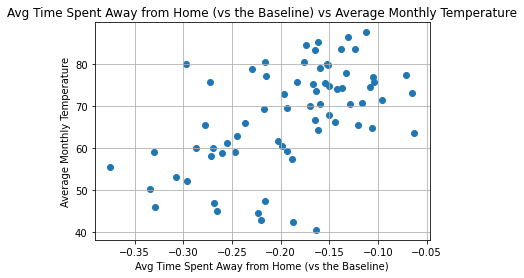

In [40]:
plt.scatter(temp_outside_df['gps_away_from_home'],temp_outside_df['Temperature'])
plt.title("Avg Time Spent Away from Home (vs the Baseline) vs Average Monthly Temperature")
plt.ylabel("Average Monthly Temperature")
plt.xlabel("Avg Time Spent Away from Home (vs the Baseline)")
plt.grid(True)


The corrleation coefficient is 0.81 meaning there is a strong positive correlation.
The Linear Regress model for this is y=148.02x + 80.48


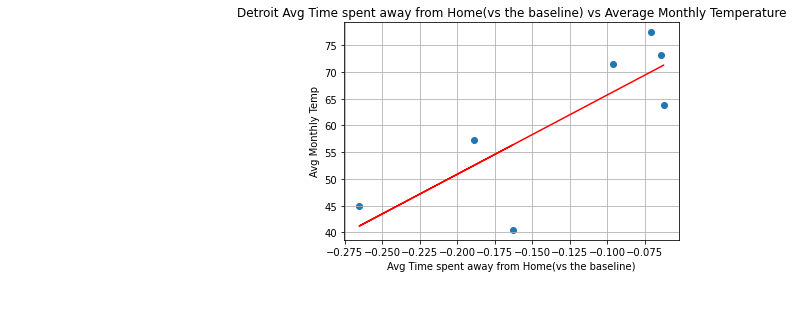

In [41]:

detroit=temp_outside_df.loc[(temp_outside_df['Name'] =='Detroit')]


(slope,intercept,rvalue,pvalue,stderr)=st.linregress(detroit['gps_away_from_home'],detroit['Temperature'])

regress_values = slope*detroit['gps_away_from_home']+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(detroit['gps_away_from_home'],detroit['Temperature'])
plt.title("Detroit Avg Time spent away from Home(vs the baseline) vs Average Monthly Temperature")
plt.ylabel("Avg Monthly Temp")
plt.grid(True)
plt.xlabel("Avg Time spent away from Home(vs the baseline)")
plt.annotate(line_eq,(-.5,25),fontsize=15,color="r")
plt.plot(detroit['gps_away_from_home'],regress_values,"r",)


print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a strong positive correlation.')
print(f'The Linear Regress model for this is {line_eq}')
